### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


lojas = [loja, loja2, loja3, loja4]
lojas_grafico = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento

Para esta análise, foi considerada a soma total de vendas de cada loja, incluindo o valor do frete, assumindo que este também é repassado integralmente à loja. Como não há uma tabela com os custos operacionais ou outras despesas, foi utilizado apenas o valor líquido, ou seja, sem estimativa de faturamento bruto.


In [39]:
import numpy as np

preco = np.array([loja['Preço'].sum() for loja in lojas])
frete = np.array([loja['Frete'].sum() for loja in lojas])

faturamento = np.round(preco + frete, 2)

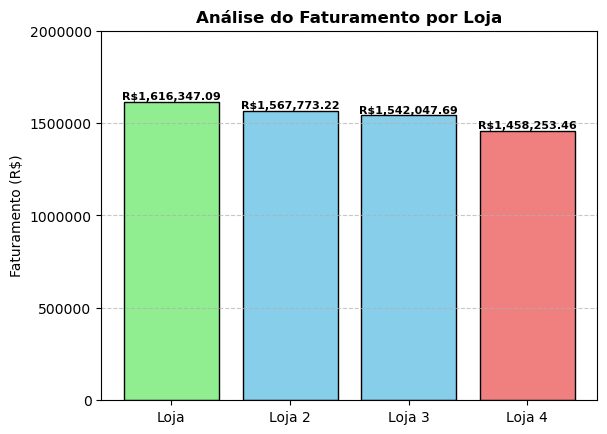

In [41]:
cores = ['lightcoral' if valor == min(faturamento) else 'lightgreen' if valor == max(faturamento) else 'skyblue' for valor in faturamento]

plt.bar(lojas_grafico, faturamento, color=cores, edgecolor='black')

plt.title('Análise do Faturamento por Loja', fontweight = 'bold', color = 'black')
plt.ylabel('Faturamento (R$)')

plt.yticks(range(0, int(max(faturamento)) + 500000, 500000))

plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(faturamento):
    plt.text(i, valor ,f'R${valor:,.2f}', ha='center', va='bottom', fontsize = 8, fontweight = 'bold', color = 'black')

plt.show()

# 2. Vendas por Categoria


In [89]:


categorias = ['moveis', 'eletronicos', 'brinquedos', 'eletrodomesticos', 'esporte e lazer', 'instrumentos musicais', 'livros', 'utilidades domesticas' ]

def somar_por_categoria(loja_df, categorias):
    valores = []
    for categoria in categorias:
        total = round(loja_df[loja_df['Categoria do Produto'] == categoria]['Preço'].sum(), 2)
        valores.append(total)
    return valores


valor_loja1 = somar_por_categoria(loja,categorias)
valor_loja2 = somar_por_categoria(loja2,categorias)
valor_loja3 = somar_por_categoria(loja3,categorias)
valor_loja4 = somar_por_categoria(loja4,categorias)


print(valor_loja1, valor_loja2, valor_loja3, valor_loja4)



[256705.65, 545966.86, 27015.67, 377680.65, 44465.65, 100136.5, 12427.77, 20098.83] [235234.68, 547773.71, 21262.21, 464758.13, 46326.09, 139987.03, 13454.35, 19662.86] [268095.56, 547699.92, 25869.2, 438984.89, 47456.1, 103174.45, 12664.7, 20080.21] [256705.65, 545966.86, 27015.67, 377680.65, 44465.65, 100136.5, 12427.77, 20098.83]


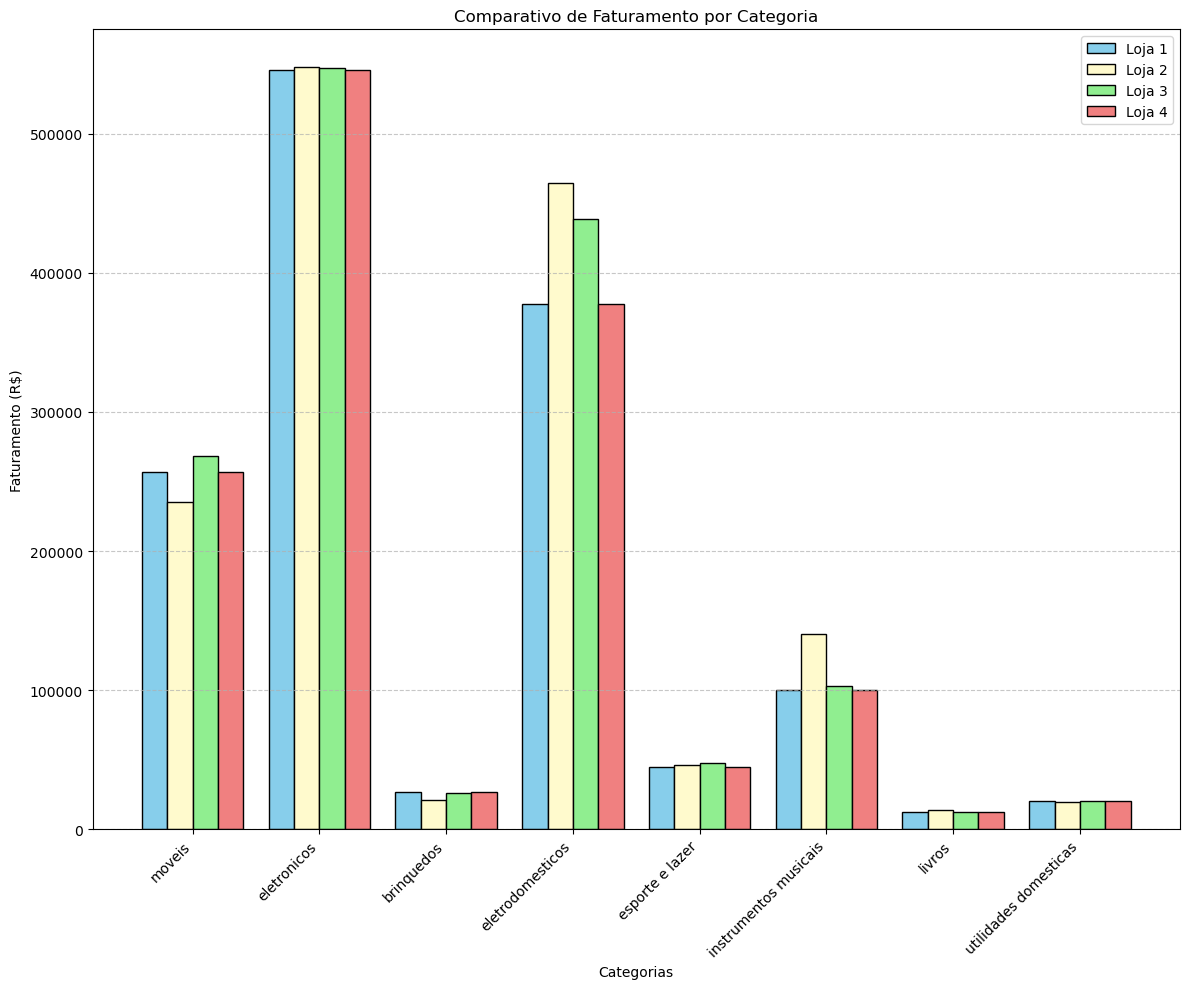

In [93]:
import numpy as np

n = len(categorias)
indice = np.arange(n)
largura = 0.2  

# Criando o gráfico
plt.figure(figsize=(12, 10))
plt.bar(indice - 1.5*largura, valor_loja1, width=largura, label='Loja 1', color='skyblue', edgecolor ='black')
plt.bar(indice - 0.5*largura, valor_loja2, width=largura, label='Loja 2', color='lemonchiffon', edgecolor ='black')
plt.bar(indice + 0.5*largura, valor_loja3, width=largura, label='Loja 3', color='lightgreen', edgecolor ='black')
plt.bar(indice + 1.5*largura, valor_loja4, width=largura, label='Loja 4', color='lightcoral', edgecolor ='black')


plt.xlabel('Categorias')
plt.ylabel('Faturamento (R$)')
plt.title('Comparativo de Faturamento por Categoria')
plt.xticks(indice, categorias, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

# 3. Média de Avaliação das Lojas

In [20]:

def media_avaliacao(loja):
    media = round(loja['Avaliação da compra'].mean(),2)
    return media

avaliacao_loja1 = media_avaliacao(loja)
avaliacao_loja2 = media_avaliacao(loja2)
avaliacao_loja3 = media_avaliacao(loja3)
avaliacao_loja4 = media_avaliacao(loja4)

avaliacoes = [avaliacao_loja1, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4]




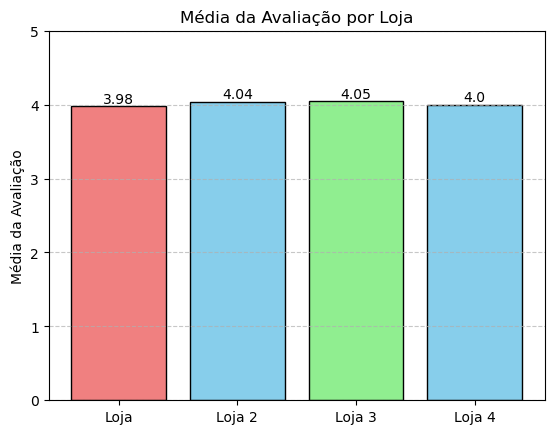

In [21]:
cores = ['lightcoral' if valor == min(avaliacoes) else 'lightgreen' if valor == max(avaliacoes) else 'skyblue' for valor in avaliacoes]

plt.bar(lojas_grafico, avaliacoes, color= cores, edgecolor = 'black')

plt.title('Média da Avaliação por Loja')
plt.ylabel('Média da Avaliação')
plt.ylim(0, 5) 

for i, valor in enumerate(avaliacoes):
    plt.text(i, valor , str(valor), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# 4. Produtos Mais e Menos Vendidos

In [ ]:
lojas = [loja, loja2, loja3, loja4]


def mais_e_menos(lojas):
    dados = []
    for i, loja in enumerate(lojas, start=1):
        contagem = loja['Produto'].value_counts()
        
        mais_vendido = contagem.idxmax()
        valor_mais_vendido = round(loja[loja['Produto'] == mais_vendido]['Preço'].sum(),2)
        menos_vendido = contagem.idxmin()
        valor_menos_vendido = round(loja[loja['Produto'] == menos_vendido]['Preço'].sum(),2)
    
        total = {
        'Loja': f'loja{i}',
        'Produto Mais Vendido': mais_vendido,
        'Qtd Produto Mais Vendido': int(contagem[mais_vendido]),
        'Valor Mais Vendido': valor_mais_vendido,
        'Menos Vendido': menos_vendido,
        'Qtd Menos Vendido': int(contagem[menos_vendido]),
        'Valor Menos Vendido': valor_menos_vendido
        }
        dados.append(total)
    return dados    
        
dados = mais_e_menos(lojas)

df = pd.DataFrame(dados)

df.head()


,Loja,Produto Mais Vendido,Qtd Produto Mais Vendido,Valor Mais Vendido,Menos Vendido,Qtd Menos Vendido,Valor Menos Vendido
0,loja1,Cama box,62,43928.57,Guitarra,33,34430.67
1,loja2,Iniciando em programação,65,4169.96,Jogo de tabuleiro,32,7749.58
2,loja3,Kit banquetas,57,22265.96,Blocos de montar,35,1649.81
3,loja4,Cama box,62,43928.57,Guitarra,33,34430.67


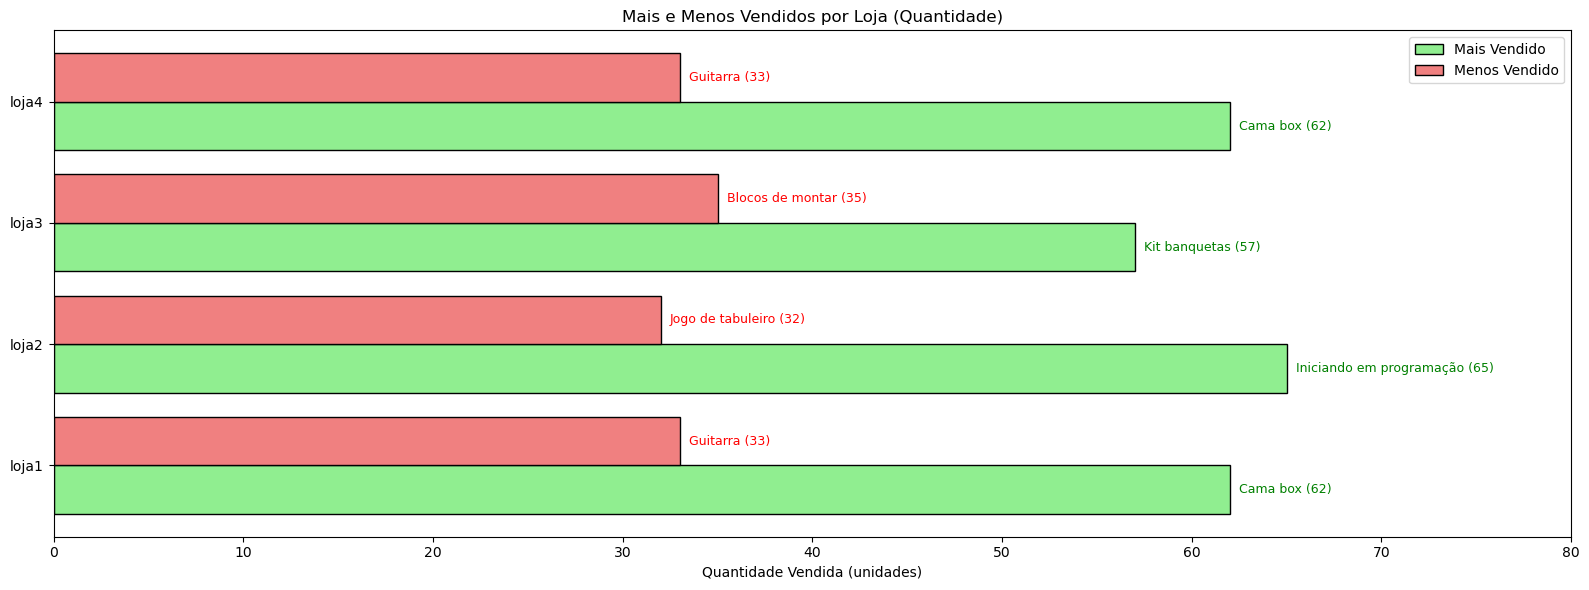

In [88]:
df = pd.DataFrame(dados)

fig, ax = plt.subplots(figsize=(16, 6))
y_pos = range(len(df))
offset = 0.2


ax.barh([y - offset for y in y_pos], df['Qtd Produto Mais Vendido'], height=0.4, color='lightgreen', edgecolor = 'black', label='Mais Vendido')
ax.barh([y + offset for y in y_pos], df['Qtd Menos Vendido'], height=0.4, color='lightcoral', edgecolor = 'black', label='Menos Vendido')

# Ajustando o texto para que fique dentro da área do gráfico
for i, produto in enumerate(df['Produto Mais Vendido']):
    texto = f"{produto} ({df['Qtd Produto Mais Vendido'][i]})"
    ax.text(df['Qtd Produto Mais Vendido'][i] + 0.5, i - offset, texto, va='center', ha='left', color='green', fontsize=9)

for i, produto in enumerate(df['Menos Vendido']):
    texto = f"{produto} ({df['Qtd Menos Vendido'][i]})"
    ax.text(df['Qtd Menos Vendido'][i] + 0.5, i + offset, texto, va='center', ha='left', color='red', fontsize=9)

ax.set_yticks(list(y_pos))
ax.set_yticklabels(df['Loja'])
ax.set_xlabel('Quantidade Vendida (unidades)')
ax.set_title('Mais e Menos Vendidos por Loja (Quantidade)')
ax.legend()

ax.set_xlim(0, 80)  
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [25]:
def frete_loja(loja):
    frete = round(loja['Frete'].mean(),2)
    return frete

fretes = [frete_loja(i) for i in lojas]
print(fretes)


[34.69, 33.62, 33.07, 31.28]


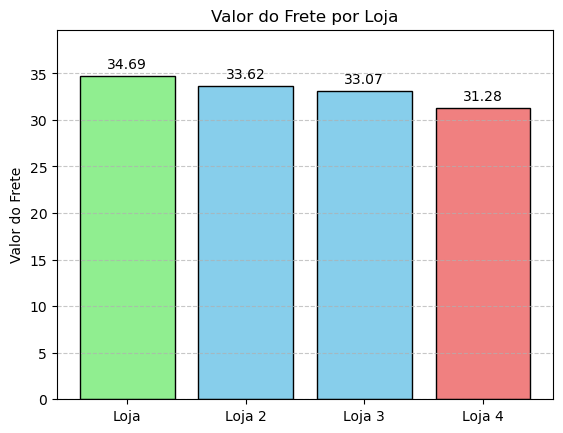

In [26]:
import matplotlib.pyplot as plt



cores = ['lightcoral' if valor == min(fretes) else 'lightgreen' if valor == max(fretes) else 'skyblue' for valor in fretes]


plt.bar(lojas_grafico, fretes, color=cores, edgecolor='black')


plt.title('Valor do Frete por Loja')
plt.ylabel('Valor do Frete') 
plt.ylim(0, max(fretes) + 5) 

plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, valor in enumerate(fretes):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')  
    
plt.show()

